In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
from datetime import datetime

In [3]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
duration_mean=train['trip_duration'].mean()
duration_std=train['trip_duration'].std()
train=train[train['trip_duration']<=duration_mean+2*duration_std]
train=train[train['trip_duration']>=duration_mean-2*duration_std]

In [9]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

In [11]:
train['pickup_datetime']=pd.to_datetime(train.pickup_datetime)
test['pickup_datetime']=pd.to_datetime(test.pickup_datetime)
train['dropoff_datetime']=pd.to_datetime(train.dropoff_datetime)
train.loc[:,'pickup_date']=train['pickup_datetime'].dt.date
test.loc[:,'pickup_date']=test['pickup_datetime'].dt.date

In [13]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,2016-03-26


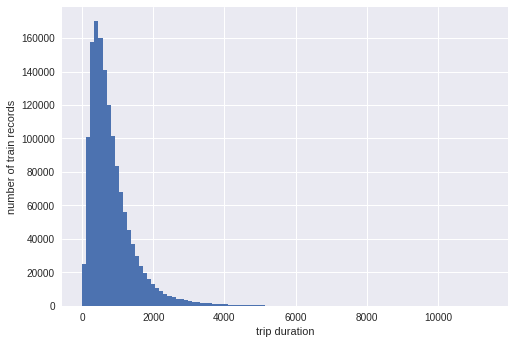

In [14]:
plt.hist(train['trip_duration'],bins=100)
plt.xlabel('trip duration')
plt.ylabel('number of train records')
plt.show()

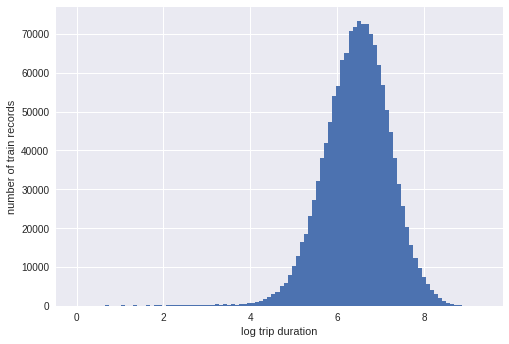

In [15]:
train['log_trip_duration']=np.log(train['trip_duration'])
plt.hist(train['log_trip_duration'],bins=100)
plt.xlabel('log trip duration')
plt.ylabel('number of train records')
plt.show()

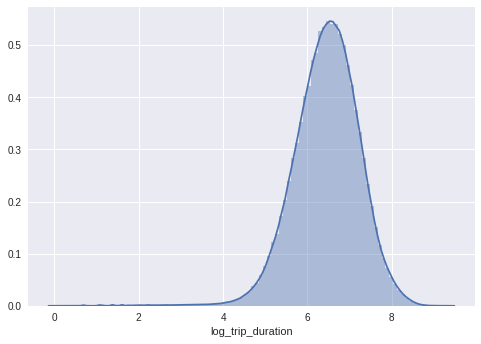

In [17]:
sns.distplot(train['log_trip_duration'],bins=100)


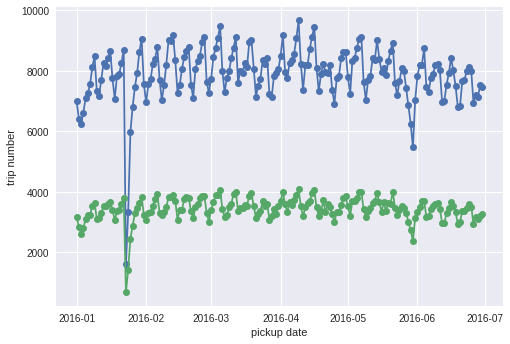

In [20]:
plt.plot(train['id'].groupby(train['pickup_date']).count(),'o-',label='train')
plt.plot(test['id'].groupby(test['pickup_date']).count(),'o-',label='test')
plt.xlabel('pickup date')
plt.ylabel('trip number')
plt.show()

(800, 900)

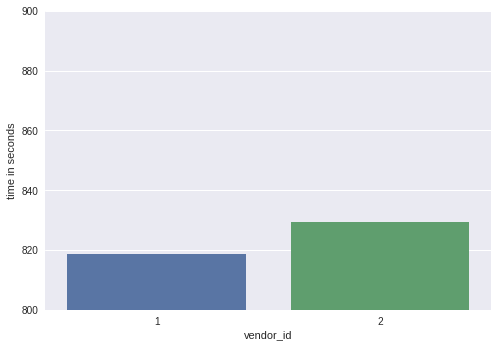

In [24]:
plot_vendor=train.groupby(train['vendor_id'])['trip_duration'].mean()
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.ylabel('time in seconds')
plt.ylim([800,900])

(600, 1200)

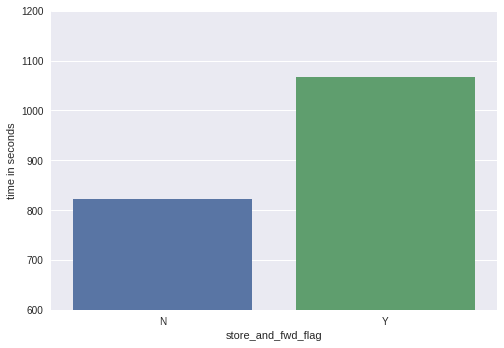

In [27]:
plot_store=train.groupby(train['store_and_fwd_flag'])['trip_duration'].mean()
sns.barplot(plot_store.index,plot_store.values)
plt.ylabel('time in seconds')
plt.ylim([600,1200])

(0, 900)

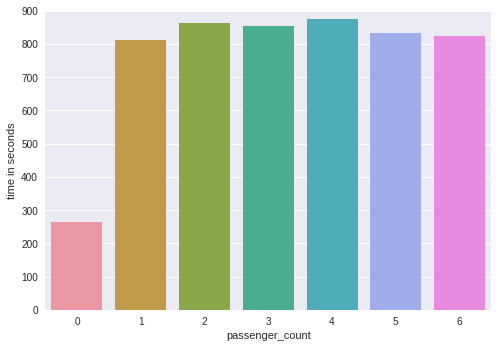

In [30]:
plot_passenger=train.groupby(train['passenger_count'])['trip_duration'].mean()
sns.barplot(plot_passenger.index,plot_passenger.values)
plt.ylabel('time in seconds')
plt.ylim([0,900])

(-74.03, -73.75)

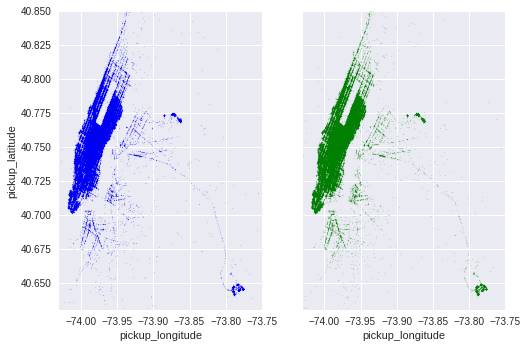

In [31]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:100000],train['pickup_latitude'].values[:100000],color='blue',alpha=0.1,s=1,label='train')
ax[1].scatter(test['pickup_longitude'].values[:100000],test['pickup_latitude'].values[:100000],color='green',alpha=0.1,s=1,label='test')
ax[0].set_ylabel('pickup_latitude')
ax[1].set_xlabel('pickup_longitude')
ax[0].set_xlabel('pickup_longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [33]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [34]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)   
train.loc[:,'distance_dummy_manhattan']=dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

In [35]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14,6.120,1.499,1.735,99.970
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12,6.497,1.806,2.431,-117.154
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,2016-01-19,7.661,6.385,8.204,-159.680
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,2016-04-06,6.061,1.485,1.661,-172.738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,2016-03-26,6.075,1.189,1.199,179.474


In [37]:
coord=np.vstack((train[['pickup_latitude','pickup_longitude']].values,train[['dropoff_latitude','dropoff_longitude']].values))

In [39]:
sample_ind=np.random.permutation(len(coord))[:500000]
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
kmeans=MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coord[sample_ind])

In [40]:
train.loc[:,'pickup_cluster']=kmeans.predict(train[['pickup_latitude','pickup_longitude']])
train.loc[:,'dropoff_cluster']=kmeans.predict(train[['dropoff_latitude','dropoff_longitude']])
test.loc[:,'pickup_cluster']=kmeans.predict(test[['pickup_latitude','pickup_longitude']])
test.loc[:,'dropoff_cluster']=kmeans.predict(test[['dropoff_latitude','dropoff_longitude']])


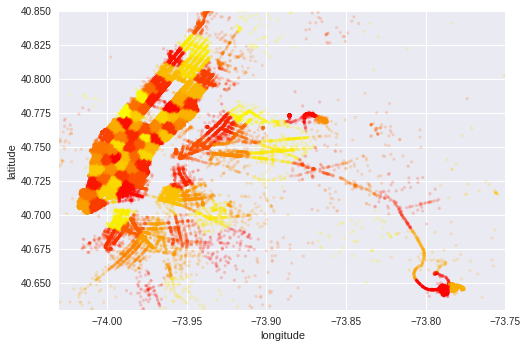

In [46]:
fig,ax=plt.subplots(ncols=1,nrows=1)
ax.scatter(train.pickup_longitude[:500000],train.pickup_latitude[:500000],c=train.pickup_cluster[:500000].values,cmap='autumn',alpha=0.2,s=10,lw=0)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

In [48]:
train['month']=train['pickup_datetime'].dt.month
test['month']=test['pickup_datetime'].dt.month

In [49]:
train['day']=train['pickup_datetime'].dt.day
test['day']=test['pickup_datetime'].dt.day
train['hour']=train['pickup_datetime'].dt.hour
test['hour']=test['pickup_datetime'].dt.hour
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek

In [50]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,month,day,hour,dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,6.120,1.499,1.735,99.970,63,21,3,14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,6.497,1.806,2.431,-117.154,13,56,6,12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,7.661,6.385,8.204,-159.680,30,23,1,19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,6.061,1.485,1.661,-172.738,9,61,4,6,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,6.075,1.189,1.199,179.474,41,11,3,26,13,5
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.983,40.742,-73.992,40.749,N,...,6.094,1.099,1.554,-44.996,40,87,1,30,22,5
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969,40.758,-73.957,40.766,N,...,5.832,1.326,1.874,47.506,7,51,6,17,22,4
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969,40.798,-73.922,40.761,N,...,7.347,5.715,8.079,136.385,18,14,5,21,7,5
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999,40.738,-73.986,40.733,N,...,5.541,1.310,1.775,118.284,24,50,5,27,23,4
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981,40.744,-73.973,40.790,N,...,7.111,5.121,5.754,7.604,40,41,3,10,21,3


In [51]:
vendor_train=pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(train['month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(train['day'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['day'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(train['hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['dayofweek'], prefix='dow', prefix_sep='_')

In [54]:
passenger_count_test=passenger_count_test.drop('pc_9',axis=1)

In [57]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'log_trip_duration',
       'distance_haversine', 'distance_dummy_manhattan', 'direction',
       'pickup_cluster', 'dropoff_cluster', 'month', 'day', 'hour',
       'dayofweek', 'avg_speed_h', 'avg_speed_m'],
      dtype='object')

In [56]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']

In [58]:
train = train.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','month','day','hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
Test_id = test['id']
test = test.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','month','day','hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

In [63]:
train = train.drop(['pickup_datetime','pickup_date','avg_speed_h','avg_speed_m'], axis = 1)
test = test.drop(['pickup_datetime','pickup_date'], axis = 1)

In [66]:
Train_Master = pd.concat([train,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_train,
                          dow_train
                         ], axis=1)

In [67]:
Test_master = pd.concat([test, 
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [72]:
test.columns

Index(['distance_haversine', 'distance_dummy_manhattan', 'direction',
       'pickup_cluster', 'dropoff_cluster'],
      dtype='object')

In [69]:
training, testing = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [73]:
X_train = training.drop(['log_trip_duration'], axis=1)
Y_train = training["log_trip_duration"]
X_test = testing.drop(['log_trip_duration'], axis=1)
Y_test = testing["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [74]:
dtrain=xgb.DMatrix(X_train,label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [76]:
md=[6]
lr=[0.1,0.3]
mcw = [20,25,30]
for m in md:
    for l in lr:
        for n in mcw:
            t0 = datetime.now()
            xgb_pars = {'min_child_weight': n, 'eta': l, 'colsample_bytree': 0.9, 
                        'max_depth': m,
            'subsample': 0.9, 'lambda': 1., 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
            model = xgb.train(xgb_pars, dtrain, 50, watchlist, early_stopping_rounds=10,
                  maximize=False, verbose_eval=1)

[0]	train-rmse:5.40219	valid-rmse:5.39139
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:4.86629	valid-rmse:4.85612
[2]	train-rmse:4.38428	valid-rmse:4.37474
[3]	train-rmse:3.95093	valid-rmse:3.94202
[4]	train-rmse:3.56149	valid-rmse:3.55324
[5]	train-rmse:3.21166	valid-rmse:3.20398
[6]	train-rmse:2.89719	valid-rmse:2.89007
[7]	train-rmse:2.61472	valid-rmse:2.60812
[8]	train-rmse:2.36144	valid-rmse:2.35537
[9]	train-rmse:2.13404	valid-rmse:2.12866
[10]	train-rmse:1.93024	valid-rmse:1.92547
[11]	train-rmse:1.7477	valid-rmse:1.74342
[12]	train-rmse:1.5846	valid-rmse:1.58085
[13]	train-rmse:1.44033	valid-rmse:1.43707
[14]	train-rmse:1.30995	valid-rmse:1.30731
[15]	train-rmse:1.19394	valid-rmse:1.19196
[16]	train-rmse:1.09097	valid-rmse:1.08959
[17]	train-rmse:0.999655	valid-rmse:0.999025
[18]	train-rmse:0.918877	valid-rmse:0.919004
[19]	train-rmse:0.847726	valid-rmse:0.848632
[

[24]	train-rmse:0.385783	valid-rmse:0.406682
[25]	train-rmse:0.384366	valid-rmse:0.405433
[26]	train-rmse:0.383015	valid-rmse:0.40427
[27]	train-rmse:0.381862	valid-rmse:0.403354
[28]	train-rmse:0.380666	valid-rmse:0.402654
[29]	train-rmse:0.379674	valid-rmse:0.401857
[30]	train-rmse:0.37868	valid-rmse:0.401311
[31]	train-rmse:0.377797	valid-rmse:0.400475
[32]	train-rmse:0.377053	valid-rmse:0.399992
[33]	train-rmse:0.376109	valid-rmse:0.399477
[34]	train-rmse:0.375276	valid-rmse:0.398847
[35]	train-rmse:0.373336	valid-rmse:0.39731
[36]	train-rmse:0.372332	valid-rmse:0.396545
[37]	train-rmse:0.371352	valid-rmse:0.396335
[38]	train-rmse:0.370646	valid-rmse:0.396006
[39]	train-rmse:0.37014	valid-rmse:0.395699
[40]	train-rmse:0.369432	valid-rmse:0.395374
[41]	train-rmse:0.368203	valid-rmse:0.394372
[42]	train-rmse:0.367749	valid-rmse:0.394266
[43]	train-rmse:0.36718	valid-rmse:0.393997
[44]	train-rmse:0.36652	valid-rmse:0.393456
[45]	train-rmse:0.3656	valid-rmse:0.393506
[46]	train-rmse:0.

In [77]:
model.best_score

0.391305

In [78]:
pred=model.predict(dtest)
pred = np.exp(pred)
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission.to_csv("submission.csv", index=False)